In [1]:
"""
Authors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499
"""

'\nAuthors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499\n'

In [2]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

In [3]:
"""Enable and configure GPU with CUDA for training (if available)"""
tf.keras.utils.disable_interactive_logging()
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Num GPUs Available:  0


In [4]:
""" Prepare test and train datasets """
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
class_names = ['airplane','automobile','cat', 'dog', 'bird', 'deer', 'frog', 'horse','ship','truck']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
"""Creation and compilation of custom model, adjusted to cifar dataset problem"""
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
"""Train model with base time benchmark"""
start = time.time()
history = model.fit(train_images, train_labels, epochs=15)
print("time: ", time.time()-start, "s")

time:  419.92396664619446 s


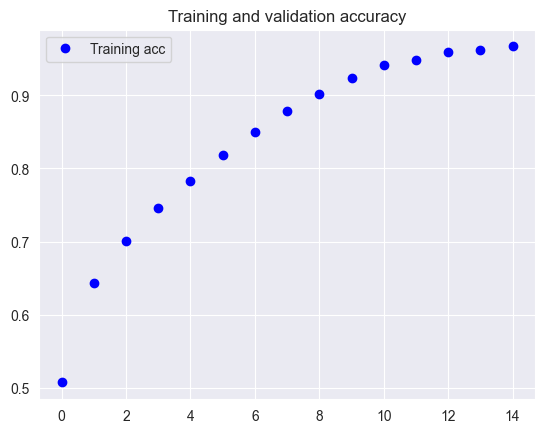


Test accuracy: 0.6922000050544739


In [7]:
"""Benchmark of accuracy, with dependency of epoch"""
plt.plot(list(range(15)), history.history["accuracy"], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [8]:
"""Preparation of confusion matrix dataframe"""
image_classes_prediction=np.argmax(model.predict(test_images), axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_labels, predictions=image_classes_prediction).numpy()
confusion_matrix_norm = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
confusion_matrix_df = pd.DataFrame(confusion_matrix_norm,index = class_names,columns = class_names)

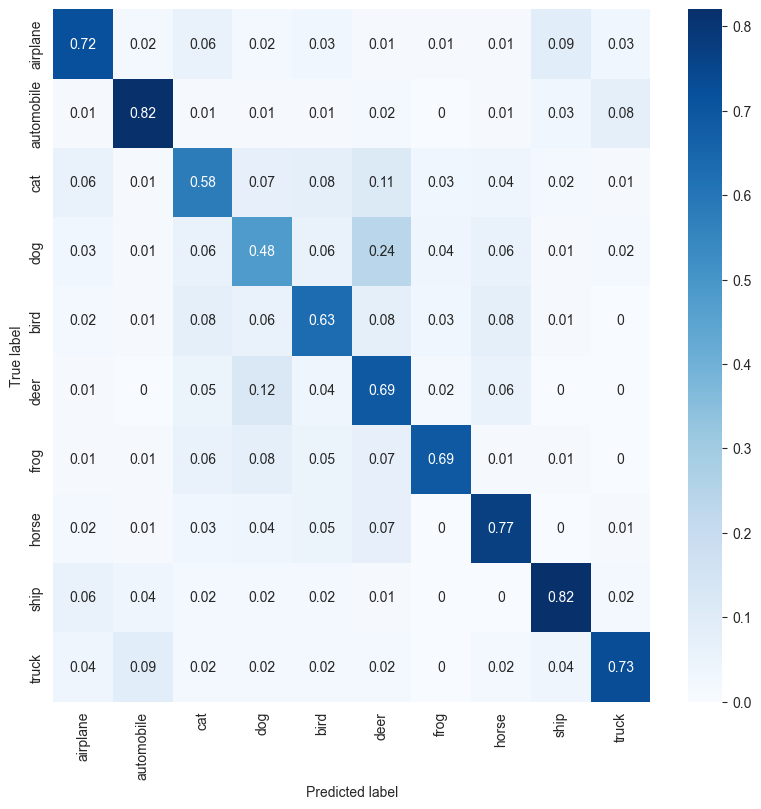

In [9]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()